In [215]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [216]:
def scatter_text(x, y, text_column, data, title, xlabel, ylabel, hue = None):
    """Scatter plot with country codes on the x y coordinates
       Based on this answer: https://stackoverflow.com/a/54789170/2641825"""
    # Create the scatter plot
    p1 = sns.scatterplot(x, y, data=data, size = 20, legend=False, hue = hue, 
                         palette = sns.color_palette("rocket", as_cmap=True))
    # Add text besides each point
    for line in range(0,data.shape[0]):
         p1.text(data[x][line]+0.01, data[y][line], 
                 data[text_column][line], horizontalalignment='left', 
                 size='medium', color='black', weight='light')
    # Set title and axis labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return p1

In [217]:
my_feature_dir = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/my_features.pkl"
df_raw = pd.read_pickle(my_feature_dir)
df = df_raw.copy()

In [255]:
stones_dir = r"/Users/James/Documents/Python/Machine Learning Projects/Spotify_Listening_Analysis/Spotify 2.0/preprocessing/pickles/rolling_stones_features.pkl"
stones_raw = pd.read_pickle(stones_dir)
stones = stones_raw.copy()

In [218]:
df.columns

Index(['artistName', 'trackName', 'minutesTotal', 'trackId', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [219]:
df = df.sort_values(by = "minutesTotal", ascending = False).reset_index()

In [220]:
df.drop(["index", "minutesTotal", "trackId", "type", "id", "uri", "track_href", "analysis_url",
         "duration_ms", "time_signature", "valence", "tempo", "mode"], axis = 1, inplace = True)

In [221]:
X = df.drop(["artistName", "trackName"], axis = 1)

In [222]:
X = scaler.fit_transform(X)

In [236]:
X_embedded = TSNE(n_components=2, learning_rate = 200).fit_transform(X)
X_embedded.shape

(8455, 2)

In [237]:
df["feature1"] = X_embedded[:,0]
df["feature2"] = X_embedded[:,1]
#df["feature3"] = X_embedded[:,2]

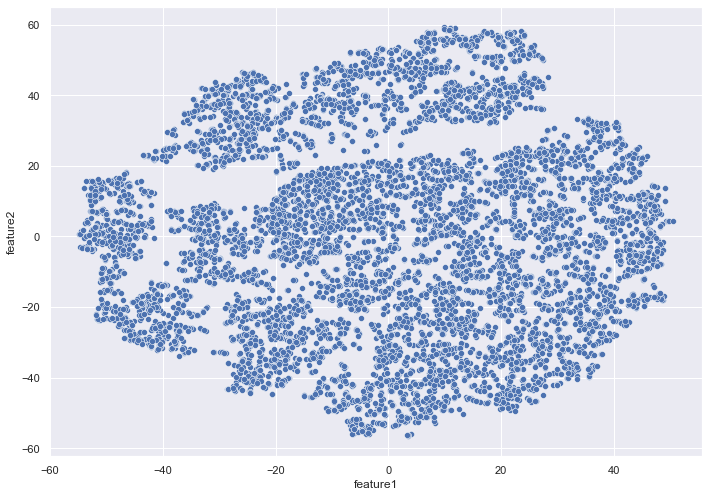

In [238]:
hue_palette = sns.color_palette("rocket", as_cmap=True)
ax = sns.scatterplot(data = df, x = "feature1", y = "feature2", 
                    palette = hue_palette )

In [241]:
test_df = df[0:20]
test_df = test_df.reset_index()

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Artist similarity'}, xlabel='feature1', ylabel='feature2'>

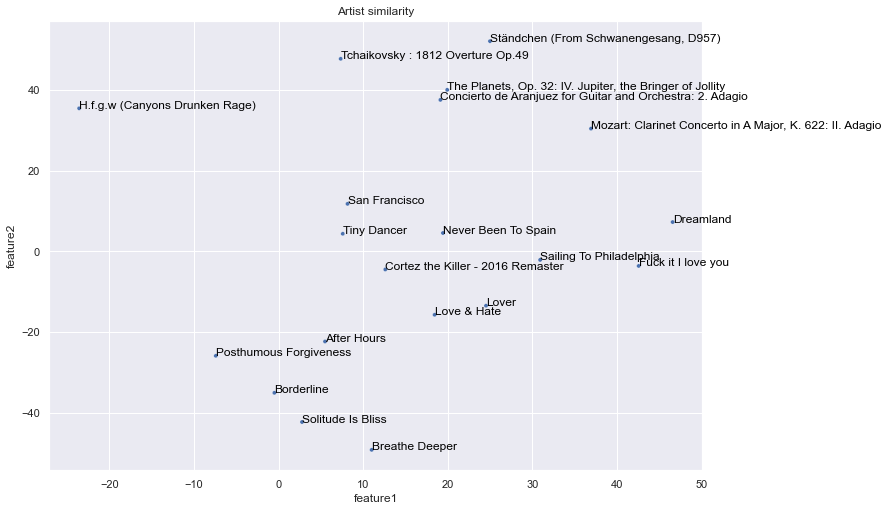

In [243]:
scatter_text(x = "feature1", 
             y = "feature2",
             text_column = "trackName", 
             data = test_df, 
             title = "Artist similarity",
             xlabel = "feature1", 
             ylabel = "feature2")

In [256]:
stones.columns

Index(['artistName', 'albumName', 'trackName', 'trackId', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [264]:
len(stones)

6621

In [257]:
X_stones = stones.drop(["artistName", "albumName", "trackName", "trackId", 
                       "valence", "type", "id", "uri", "track_href", 
                       "analysis_url", "analysis_url", "time_signature"], axis = 1)

In [258]:
X_stones = scaler.fit_transform(X_stones)

In [265]:
X_stones_embedded = TSNE(n_components=2, learning_rate = 200).fit_transform(X_stones)
X_stones_embedded.shape

(6621, 2)

In [266]:
stones["feature1"] = X_stones_embedded[:,0]
stones["feature2"] = X_stones_embedded[:,1]
#stones["feature3"] = X_stones_embedded[:,2]

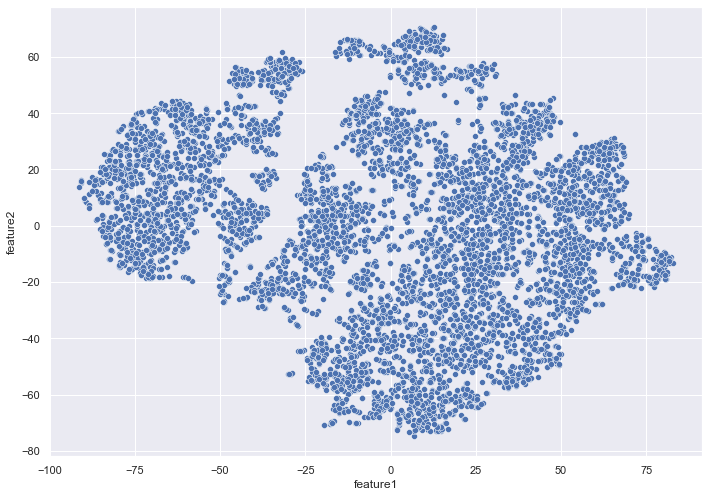

In [267]:
ax1 = sns.scatterplot(data = stones, x = "feature1", y = "feature2", 
                    palette = hue_palette )

In [ ]:
sample_range = [1,10,20,30,50]

In [ ]:

test_stones = test_stones.iloc[1::5, :].reset_index()
test_stones.info()

/Users/James/.pyenv/versions/3.8.5/envs/ml_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Artist similarity'}, xlabel='feature1', ylabel='feature2'>

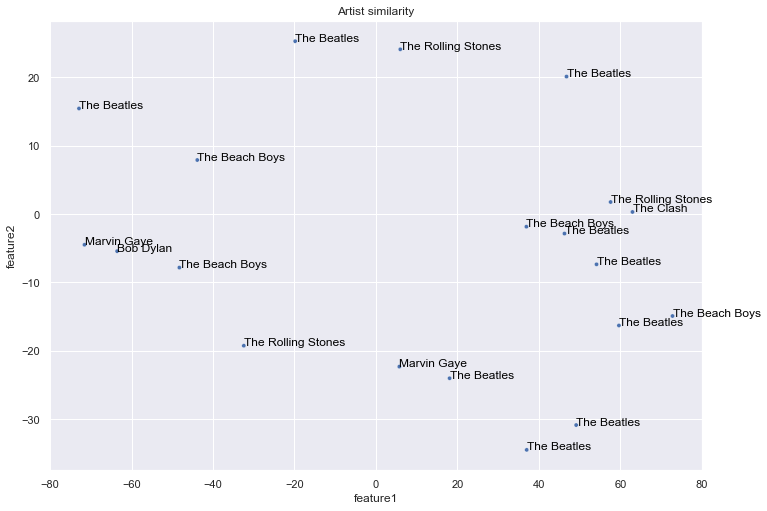

In [289]:
scatter_text(x = "feature1", 
             y = "feature2",
             text_column = "artistName", 
             data = test_stones, 
             title = "Artist similarity",
             xlabel = "feature1", 
             ylabel = "feature2")